# Supervised learning regression

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
df = pd.read_csv('datasets/train_V2_cleaned_profit.csv')

## Train and val split

shuffling the data

In [3]:
from random import Random
df_shuffle = df.sample(frac=1)

Train/val split

In [4]:
from sklearn.model_selection import train_test_split

X = df_shuffle.drop(['outcome_profit'],1)
y = df_shuffle['outcome_profit']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.2, random_state=1234)

C:\Users\robbe\AppData\Local\Temp/ipykernel_11356/3507664710.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_shuffle.drop(['outcome_profit'],1)


## Linear regression

training

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

evaluating

In [6]:
predictions_train = reg.predict(X_train)
predictions_val = reg.predict(X_val)

In [7]:
from sklearn.metrics import r2_score
print(r2_score(y_train, predictions_train))
print(r2_score(y_val, predictions_val))

0.5273097604177048
0.49819422707428984


# Polynomial regression

Designing the features

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

X_train_poly.shape

(3200, 2278)

In [9]:
reg_quad = LinearRegression(fit_intercept=False)
reg_quad.fit(X_train_poly, y_train)

LinearRegression(fit_intercept=False)

In [10]:
print(reg_quad.score(X_train_poly, y_train))
print(reg_quad.score(X_val_poly, y_val))

0.7127924013528382
-5.188084726463336e+18


# Higher order polynomials

cross validation

In [11]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

avg_scores = [None] * 5

for i in np.arange(1,6):
    
    reg_poly = Pipeline([('poly', PolynomialFeatures(degree=i)),
                  ('linear', LinearRegression(fit_intercept=False))])
    
    scores = cross_val_score(reg_poly, X_train, y_train, scoring = 'r2', cv=5)
    
    avg_scores[i-1] = scores.mean()
    
    print("Order "+str(i)+": avg R^2 = "+str( avg_scores[i-1]))

Order 1: avg R^2 = 0.5079611485050608
Order 2: avg R^2 = -4.971758214027705e+19


plotting the results

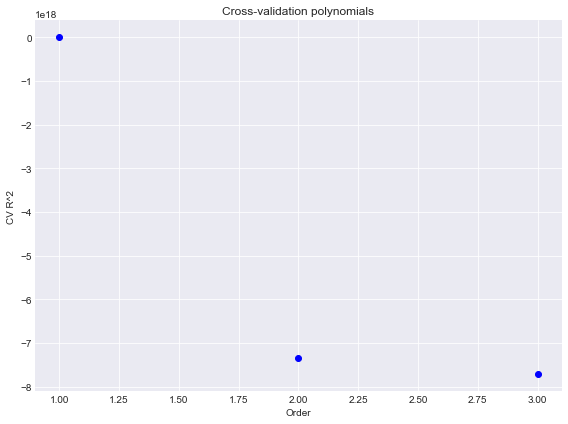

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(np.arange(1,6), avg_scores, c='b', label='data')
plt.axis('tight')
plt.title("Cross-validation polynomials")
ax.set_xlabel("Order");
ax.set_ylabel("CV R^2");
plt.tight_layout()
plt.show()

# Regression

## Nearest neighbors

### RNN

In [ ]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score

Radius = np.linspace(45,60,15)    # This will give an array of numbers between 45 and 60
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the 11 possible values for the radius (bandwith)
for k in Radius:
    Rnn = RadiusNeighborsRegressor(radius= k)
    scores = cross_val_score(Rnn, X_train, y_train,  cv=5)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

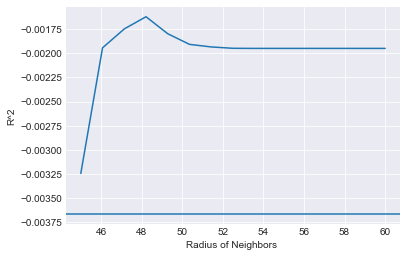

In [ ]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(Radius, cv_scores)
plt.xlabel('Radius of Neighbors ')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()

Rnn is useless, it's undefitted with even the lowest radius possible

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

K = np.arange(1,1000)    
cv_scores = []
sd_scores = []
# perform 5-fold cross validation on the  possible values for the radius (bandwith)
for k in K:
    knn = KNeighborsRegressor(n_neighbors= k)
    scores = cross_val_score(knn, X_train, y_train,  cv=10)
    cv_scores.append(scores.mean())
    sd_scores.append(np.sqrt(scores.var())/np.sqrt(5))

In [ ]:
max_value = max(cv_scores)
max_index = cv_scores.index(max_value)

plt.plot(K, cv_scores)
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')
plt.axhline(y=max_value-1.96*sd_scores[max_index])

plt.show()
print('The best k is', K[max_index])

In [ ]:
start = 60
stop = 70

plt.plot(K[start : stop],cv_scores[start : stop])
plt.xlabel('k Neighbors ')
plt.ylabel('R^2')

plt.axhline(y=max_value-1.96*sd_scores[max_index])


plt.show()
print('The best k is', K[max_index])

De beste k is 13, maar 68 is de hoogste dat nog boven de grens ligt, dus we nemen deze.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=68)
knn.fit(X_train, y_train)  
print('train value for k=30:',knn.score(X_train, y_train) )
print('validation value for k=30:',knn.score(X_val, y_val) )

### Penalisatie

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_train_poly.shape

In [ ]:
from sklearn.linear_model import LassoCV
linreg_lassoCV = LassoCV(cv=5, max_iter=500, verbose=1, n_jobs=6).fit(X_train_poly, y_train)
print('R2 Training : %.3f' % linreg_lassoCV.score(X_train_poly, y_train))
print('R2 Testing : %.3f' % linreg_lassoCV.score(X_val_poly, y_val))

# Three based methods

## Random forest


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

criterion =['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 200)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 490)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes}

# then do cross-validatoin
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, 
                               cv = 10, verbose=5, random_state=6541, n_jobs=-1)

# n_jobs=-1 to run as many models  parallel as possible
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


In [ ]:
print(rf_random.score(X_train, y_train))
print(rf_random.score(X_val, y_val))

In [ ]:
out = pd.DataFrame(rf_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_max_features', 'param_max_leaf_nodes', 'param_criterion']

fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_max_depth'], out['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out['param_min_samples_split'], out['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out['param_min_samples_leaf'], out['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out['param_n_estimators'], out['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out['param_max_features'], out['mean_test_score'], c='blue');
axs[1,1].set_title('max_features')

axs[1,2].scatter(out['param_max_leaf_nodes'], out['mean_test_score'], c='blue');
axs[1,2].set_title('max_leaf_nodes')

axs[2,0].scatter(out['param_criterion'], out['mean_test_score'], c='blue');
axs[2,0].set_title('criterion')

for ax in axs.flat:
    ax.set(ylabel='r_squared')

In [ ]:
out = out[out.mean_test_score > 0.59]

In [ ]:
xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators', 'param_max_leaf_nodes']
for xlabel in xlabel_names:
    fig, ax = plt.subplots(figsize=(8,6))
    xs = out[xlabel]
    ys = out['mean_test_score']
    ax.scatter(xs, ys, c='blue');
    ax.set_xlabel(xlabel);
    ax.set_ylabel("r_squared");
    ax.set_title(xlabel)

    for x, y in zip(xs, ys):
        label = f"({x}, {round(y, 3)})"
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

In [ ]:
rf_random.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


max_depth = [9, 10, 13]
min_samples_split = [5, 9, 10, 12, 13]
min_samples_leaf = [1, 2, 3, 4]
n_estimators = [230, 317, 369, 405, 467]
max_features = ['auto']
max_leaf_nodes = [90, 119, 166, 247, 328]
criterion =['mse']


# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
                'max_leaf_nodes': max_leaf_nodes,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# then do cross-validatoin
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = grid,
                               cv = 10,verbose=1,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
rf_grid.fit(X_train, y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
params = rf_grid.best_params_
rf_gridBest = RandomForestRegressor(**params)
rf_gridBest.fit(X_train, y_train)
print('R2: %.3f' % rf_gridBest.score(X_train, y_train))
print('R2: %.3f' % rf_gridBest.score(X_val, y_val))

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))

feat_importances = pd.Series(rf_gridBest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(38).plot(kind='barh')
plt.show()

In [ ]:
plt.figure()

feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Gradient boosting regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

max_features = ['auto']
criterion =['mse']
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 300)]
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(2, 15, num = 14)]
min_samples_leaf = [int(x) for x in np.linspace(1, 15, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(10, 500, num = 50)]
loss = ['ls','lad','huber','quantile']
learning_rate = [round(x,5) for x in np.linspace(0.1, 1, num = 10)]

# create the random grid to search for best hyperparameters
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_leaf_nodes': max_leaf_nodes,
               'loss': loss,
               'learning_rate': learning_rate}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 1000, 
                               cv = 10, verbose=2, random_state=1234, n_jobs=-1)
gbm_random.fit(X_train, y_train)

In [ ]:
print(gbm_random.score(X_train, y_train))
gbm_random.score(X_val, y_val)

In [ ]:
out2 = pd.DataFrame(gbm_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators', 'param_max_leaf_nodes']
for xlabel in xlabel_names:
    fig, ax = plt.subplots(figsize=(8,6))
    xs = out2[xlabel]
    ys = out2['mean_test_score']
    ax.scatter(xs, ys, c='blue');
    ax.set_xlabel(xlabel);
    ax.set_ylabel("r_squared");


In [ ]:
out2 = out2[out2.mean_test_score > 0.651]

In [ ]:
xlabel_names = ['param_n_estimators', 'param_min_samples_split','param_min_samples_leaf','param_max_leaf_nodes','param_max_depth', 'param_learning_rate']
for xlabel in xlabel_names:
    fig, ax = plt.subplots(figsize=(10, 8))
    xs = out2[xlabel]
    ys = out2['mean_test_score']
    ax.scatter(xs, ys, c='blue');
    ax.set_xlabel(xlabel);
    ax.set_ylabel("r_squared");
    ax.set_title(xlabel)
    print(xlabel)
    for x, y in zip(xs, ys):
        label = f"({x}, {round(y, 3)})"
        print(label)
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

In [ ]:
gbm_random.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
n_estimators = [142, 137, 153, 302, 203, 410]
min_samples_split = [4, 8, 10, 14, 15]
min_samples_leaf = [3, 4, 8, 13]
max_leaf_nodes = [10, 180, 250, 270, 500]
max_features = ['auto']
max_depth = [2, 3, 4, 5, 8]
loss = ['ls']
learning_rate = [0.06, 0.08,0.1,0.12,0.14]
criterion =['mse']

# create the random grid to search for best hyperparameters
grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'max_leaf_nodes': max_leaf_nodes,
               'learning_rate': learning_rate,
               'loss':loss}

# then do cross-validatoin
gbm = GradientBoostingRegressor()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = grid,
                               cv = 10, verbose=2,  n_jobs=-1)
# n_jobs=-1 to run as many models  parallel as possible
gbm_grid.fit(X_train, y_train)

In [ ]:
gbm_grid.best_params_

In [ ]:
params = gbm_grid.best_params_
gbm_gridBest = GradientBoostingRegressor(**params)
gbm_gridBest.fit(X_train, y_train)
print('R2: %.3f' % gbm_gridBest.score(X_train, y_train))
print('R2: %.3f' % gbm_gridBest.score(X_val, y_val))

In [ ]:
import joblib

In [ ]:
joblib.dump(gbm_gridBest, "Profit_best_model.pkl")